<a href="https://colab.research.google.com/github/god05212/Machine-Learning/blob/main/%EA%B3%A0%EA%B0%9D%EC%9D%B4_%ED%98%B8%ED%85%94%EC%98%88%EC%95%BD%EC%9D%84_%EC%B7%A8%EC%86%8C%ED%95%A0%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
updloaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations (1).csv


> **변수에 대한 설명**  
Booking_ID : 각 예약의 고유 식별자  
no_of_adults : 성인 수  
no_of_children : 자녀 수  
no_of_weekend_nights : 손님이 호텔에 투숙했거나 예약한 주말 밤(토요일 또는 일요일)의 수  
no_of_week_nights : 게스트가 호텔에 숙박했거나 숙박을 예약한 주중 밤 수(월요일~금요일)  
type_of_meal_plan : 고객이 예약한 식사 플랜 유형  
required_car_parking_space : 고객이 주차 공간을 필요로 합니까? (0 - 아니오, 1- 예)  
room_type_reserved : 고객이 예약한 객실 유형. 값은 INN Hotels에서 암호화(인코딩)됩니다.  
lead_time : 예약일과 도착일 사이의 일수  
arrival_year : 도착 연도  
arrival_month : 도착한 달  
arrival_date : 해당 월의 날짜  
market_segment_type : 시장 부문 지정.  
repeatd_guest : 고객이 반복 손님입니까? (0 - 아니오, 1- 예)  
no_of_previous_cancellations : 현재 예약 이전에 고객이 취소한 이전 예약 수  
no_of_previous_bookings_not_canceled : 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수  
avg_price_per_room : 예약 당일 평균 가격. 객실 가격은 유동적입니다. (유로)  
no_of_special_requests : 고객이 요청한 총 특별 요청 수(예: 높은 층, 객실에서 보이는 전망 등)  
booking_status : 예약이 취소되었는지 여부를 나타내는 플래그입니다.

In [15]:
# dataset 가져오기
import pandas as pd
# 변수의 이름 "df"를 사용하여 데이터베이스 읽기
df = pd.read_csv('Hotel Reservations.csv')
# dataset 상위 5개만 보기
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [16]:
# 행 36275, 열 19
df.shape

(36275, 19)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [18]:
# 이 dataset에는 NaN 값이 없음
df.isnull().sum().sum() == 0

True

In [19]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

> 여기서 범주형 및 연속형 변수가 있고, 이 'Booking_ID'열이 사용되지 않을 수 있으며, null 값이 없는 것도 확인할 수 있습니다.

> 변수 간의 상관 관계를 확인.

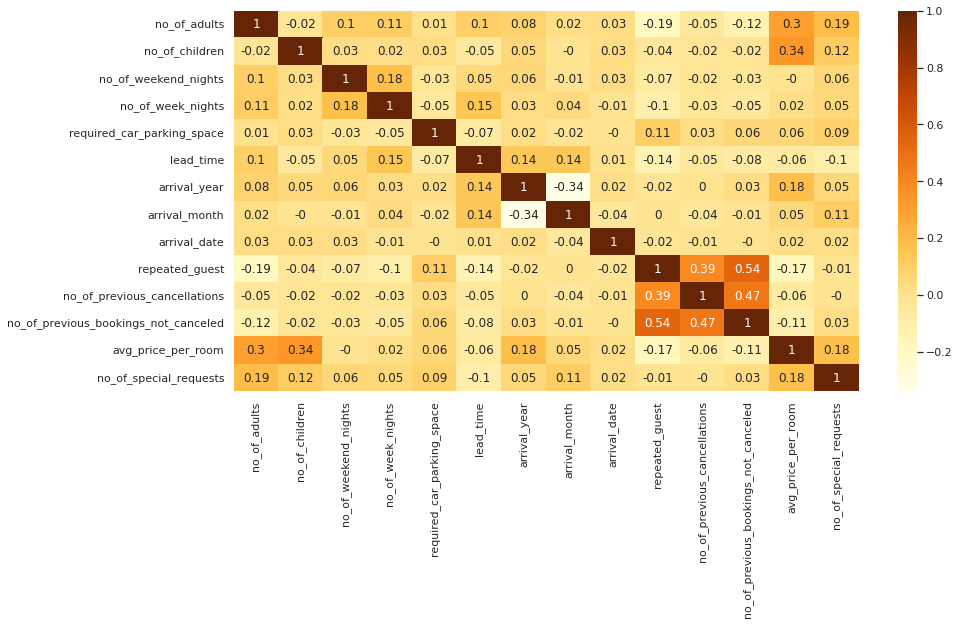

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

양의 상관관계 예시(r > 0) : 지능지수와 성적, 키와 몸무게  
음의 상관관계 예시(r < 0) : 농작물 수확량과 가격, 고도와 기온  
무의 상관관계 예시(r = 0) : 범죄율과 아이스크림 판매량  

-1.0 <= r <= -0.7 : 매우 강한 음(-)의 상관관계  
-0.7 < r <= -0.3 : 비교적 강한 음(-)의 상관관계  
-0.3 < r <= -0.1 : 약한 음(-)의 상관관계  
-0.1 < r <= 0.1 : 상관관계 없음  
0.1 < r <= 0.3 : 약한 양(+)의 상관관계  
0.3 < r <= 0.7 : 비교적 강한 양(+)의 상관관계  
0.7 < r <= 1.0 : 매우 강한 양(+)의 상관관계

> 히트맵을 통해 우리는 변수들 사이에 강한 상관관계가 없다는 것을 알 수 있다.

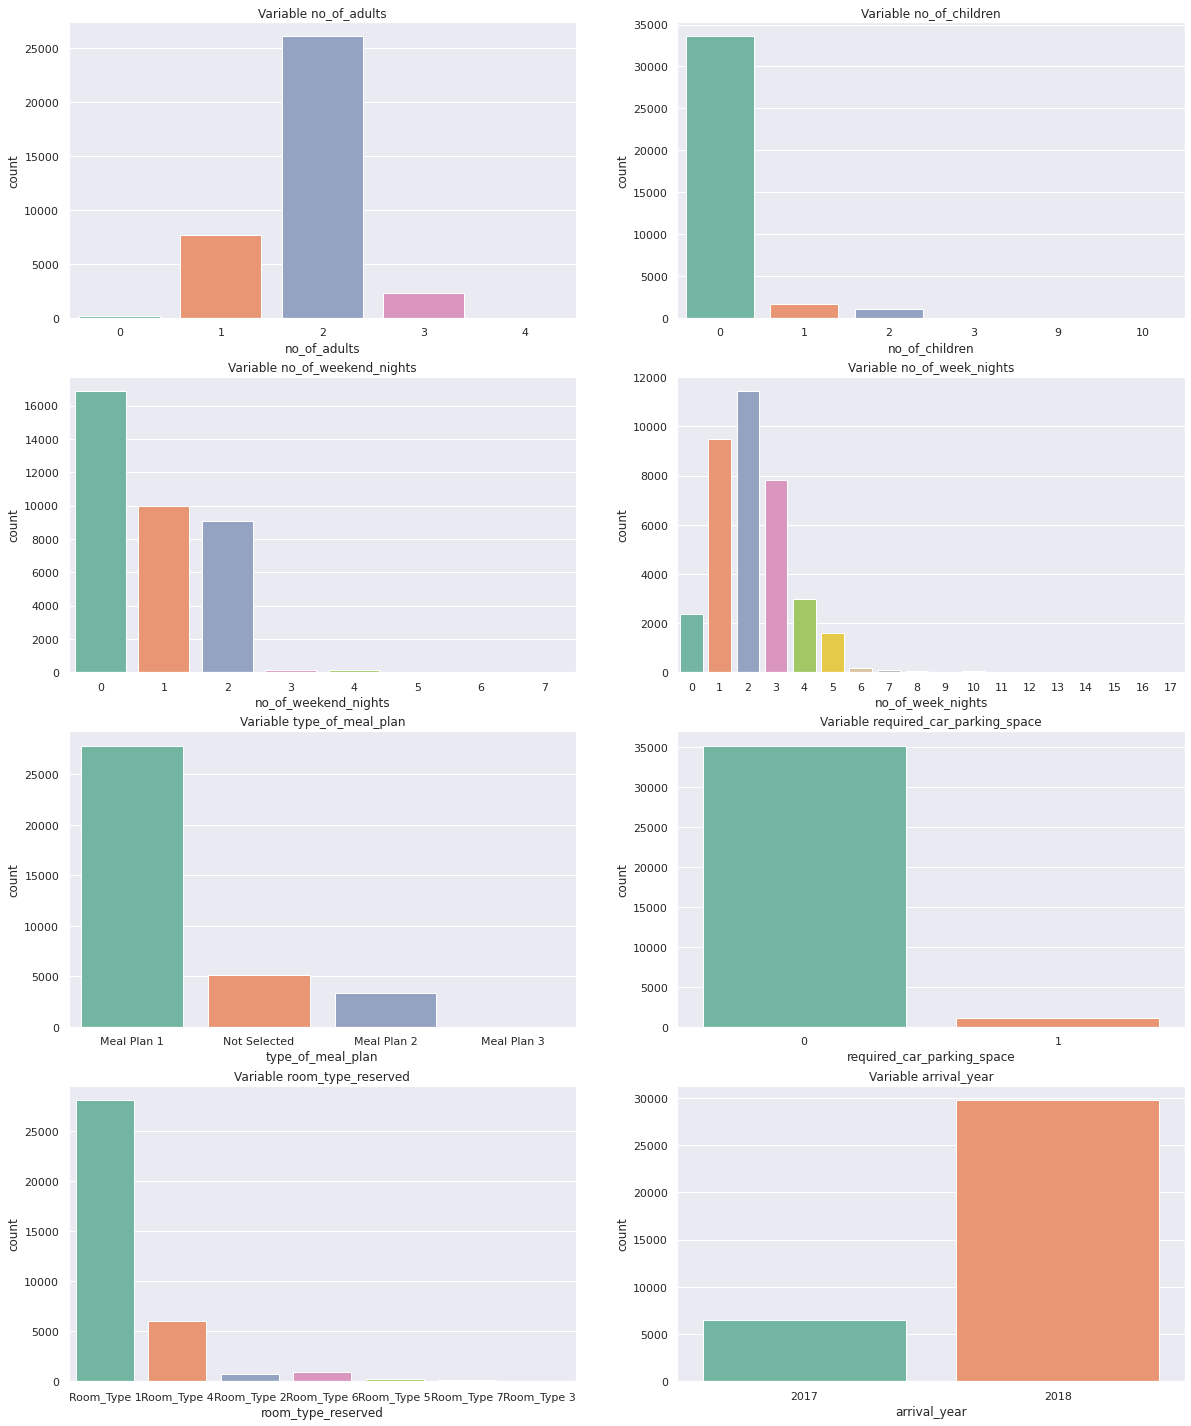

In [21]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

> 범주형 변수를 보면, 성인 2명이 있는 방에 대해 대부분의 예약이 이루어지며, 아이가 없는 방은 일반적으로 단기 예약이며, 많은 경우가 장기 예약이 아니며, 대부분의 예약은 식사_플랜_1을 선택하고, 차량 공간이 필요하지 않으며, 가장 예약된 객실 유형은 1번과 4번 유형이며, 대부분의 데이터는 2018년 예약임을 알 수 있습니다.

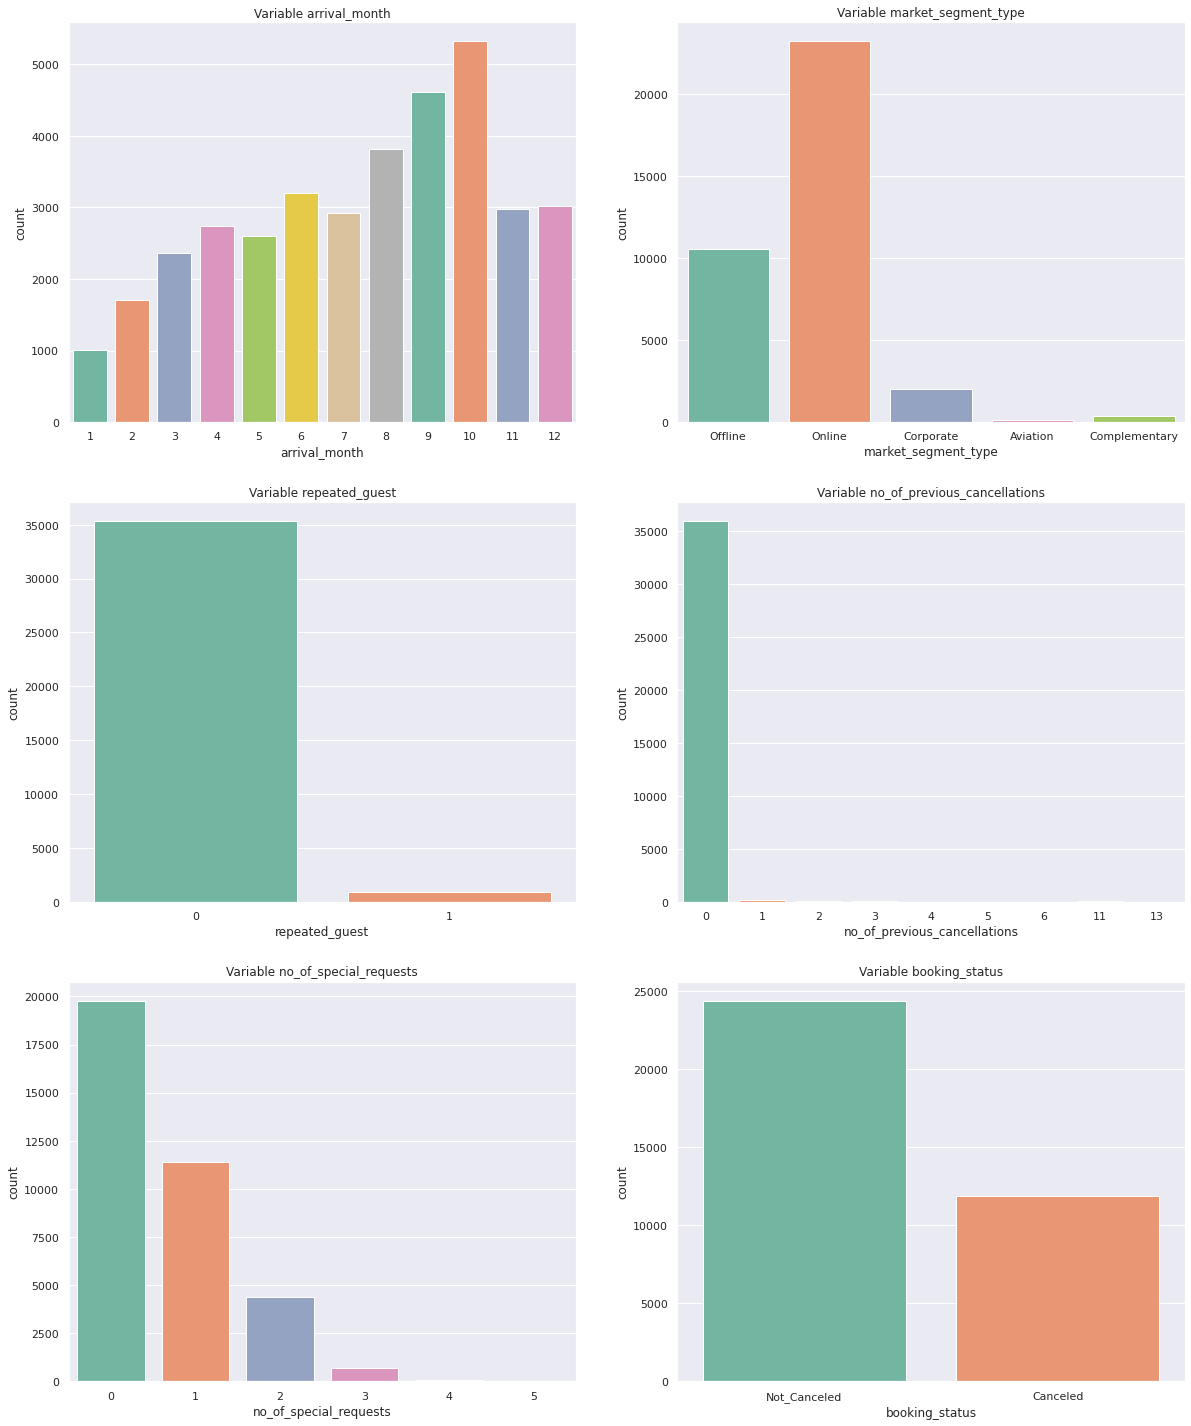

In [22]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

> 월별 예약을 보면 1월부터 10월까지 예약 건수가 점차 증가하다가 11월과 12월에 다시 감소하고, 대부분의 예약은 온라인으로 이루어지며, 대부분의 투숙객들은 호텔에 가본 적이 없는 투숙객들이며, 보통 취소를 한 적이 없는 투숙객들이다 특수 요청의 수가 많을수록 데이터가 줄어듭니다. 목표 변수를 보면 약 65%의 예약이 취소되지 않은 것을 알 수 있습니다.

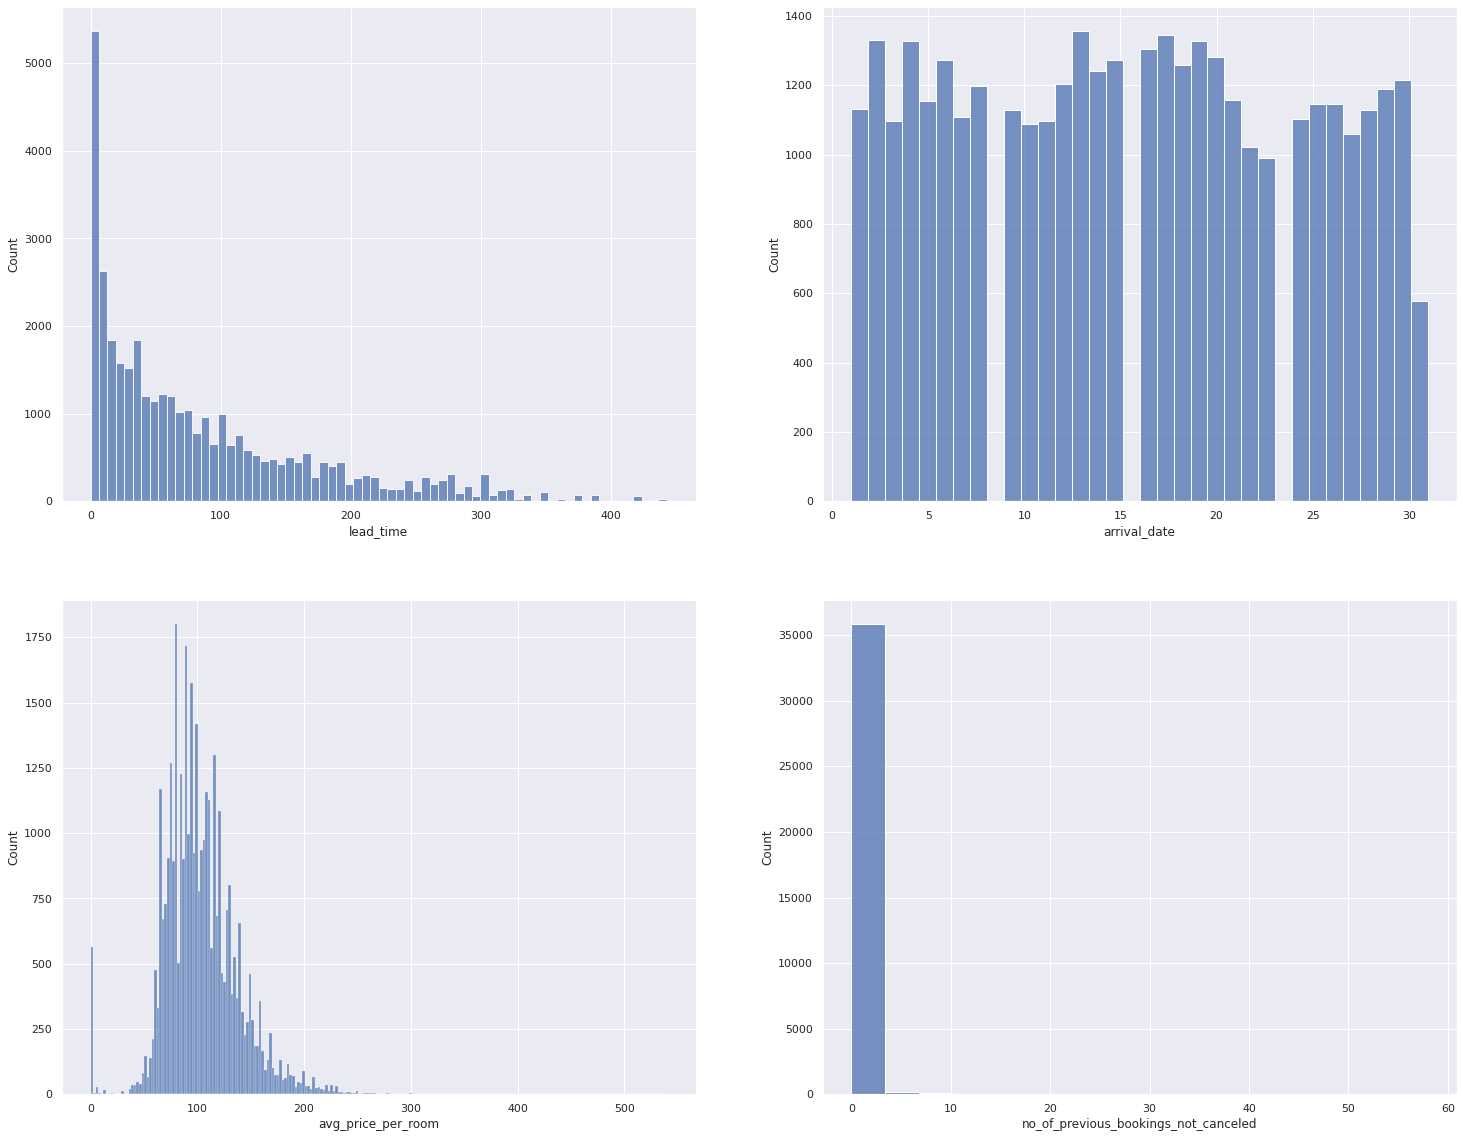

In [23]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

> 연속 변수를 보면 일반적으로 너무 오래 걸리지 않고 예약이 이루어지며 시간이 오래 걸릴수록 예약 횟수가 적다는 것을 알 수 있습니다. 데이터의 상위 항목은 보통 객실 평균 가격 100유로이며 투숙객은 이전에 예약을 취소한 적이 없습니다.

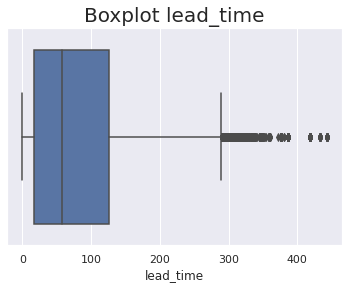

In [24]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

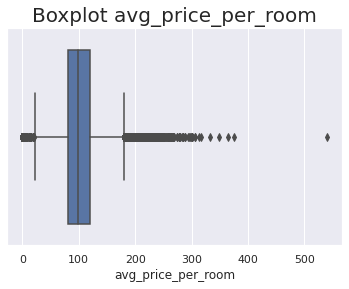

In [25]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

> Boxplot을 확인할 때 outliers가 있다는 것을 알 수 있습니다.

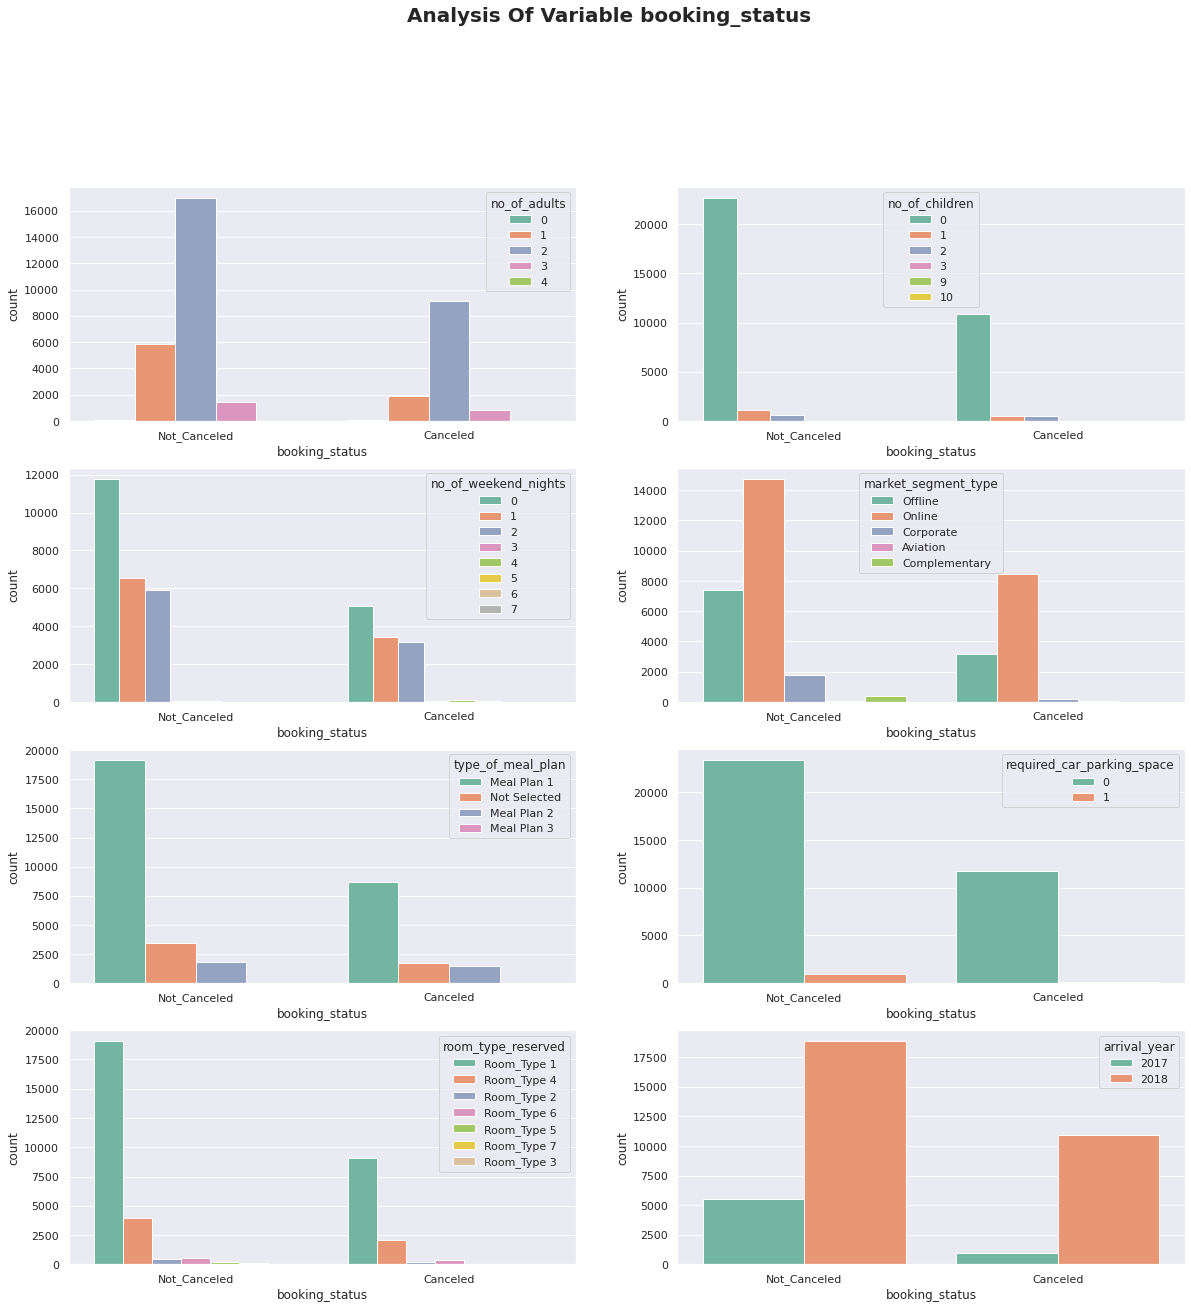

In [26]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

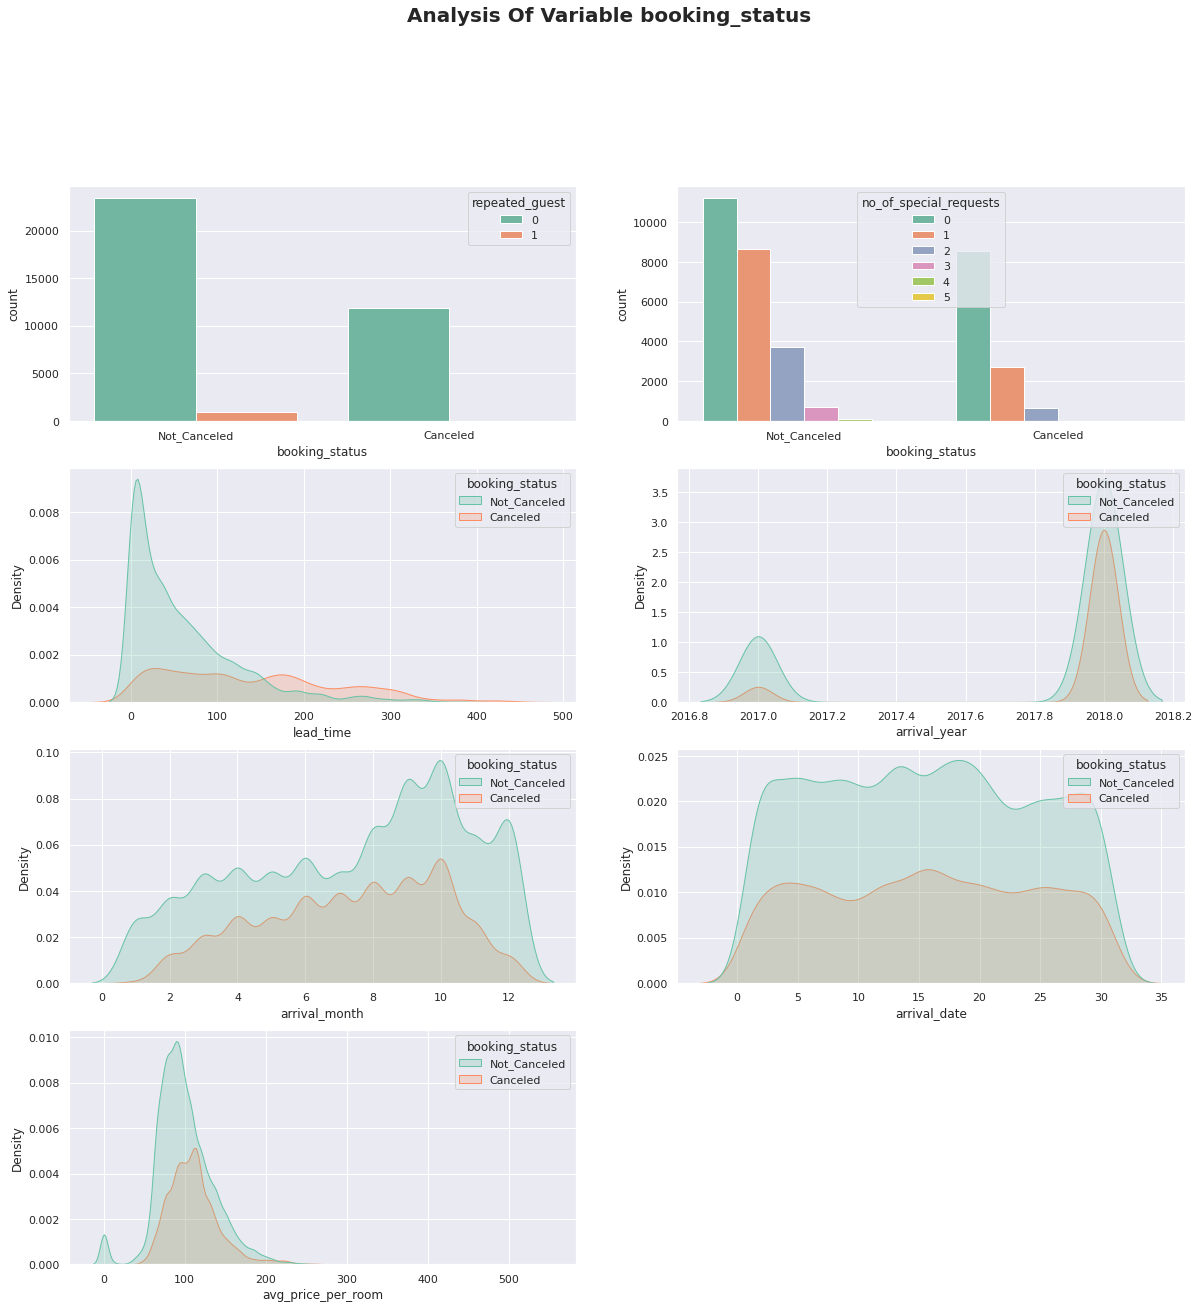

In [27]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

> target 변수를 살펴보면 주차 공간을 요청하는 손님들, 이전에 머물렀던 손님들은 일반적으로 예약을 취소하지 않는 손님들이다. 특별한 요청을 하고, 요청이 많을수록 손님들은 취소할 가능성이 적다. 그러나 사람들이 방을 예약하는 데 오래 걸릴수록 취소할 가능성은 높아진다. 또 다른 흥미로운 견해는 1년의 마지막 3개월 동안 우리는 보통 약간의 상승에도 불구하고, 더 비싼 방들도 더 많은 취소를 경험할 수 있다는 것을 볼 수 있다.

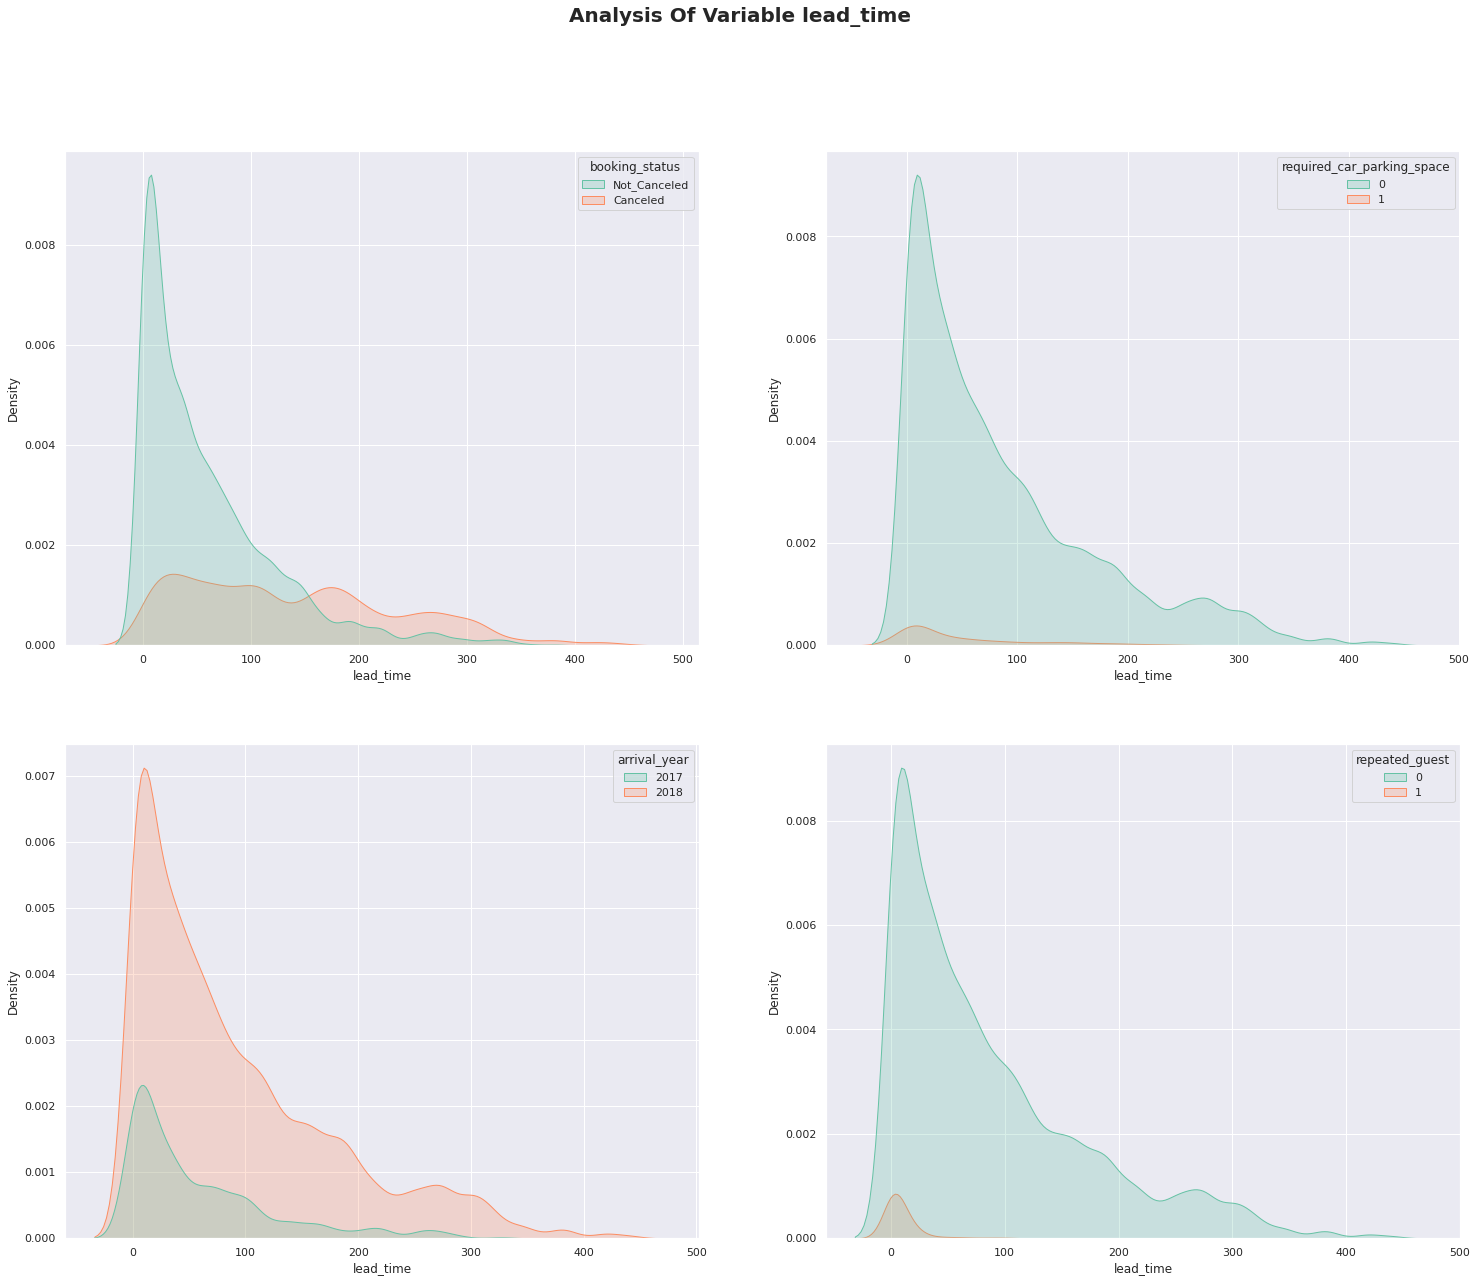

In [28]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

> 앞서 살펴본 것처럼 canceled과 non-cancelled가 가장 많이 구분된 것이 Lead_Time 변수였기 때문에 좀 더 자세히 살펴볼 것입니다. 일반적으로 주차 공간을 요청하는 사람들은 Lead_Time이 더 짧다는 것을 알 수 있는데, 호텔에 이미 투숙한 손님들도 마찬가지입니다. 우리가 집중해야 할 다른 변수들이 있는데, 변수 no_weekend_nights은 보통 3~4박을 하는 사람들이 더 길고, 세그먼트를 볼 때도 "특별한" 이유로 손님들은 보통 리드 타임이 높지 않으며, 우리가 mal_plan을 볼 때, mal_plan2를 사용하는 손님들은 보통 우리가 볼 때, 식사 계획을 사용하는 손님들은 매우 높다 우리가 보는 방의 유형은 다른 방들보다 더 빨리 선택되고 특별한 요청을 볼 때, 비록 더 많은 요청이 필요하지만 리드 타임은 낮아집니다.